<a href="https://colab.research.google.com/github/pankaj7322/prediction-CatsVsDogs-without-transferlearning/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:06<00:00, 130MB/s]
100% 1.06G/1.06G [00:06<00:00, 173MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [5]:
# generators (divide the data into batches because images are more)
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train', # file path
    labels = 'inferred',  # automatically label the images
    label_mode = 'int',  # convert labels to integers  0 for cat 1 for dog
    batch_size = 32,  # number of images in each batch
    image_size = (256, 256) # resize images to 256x256
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test', # file path
    labels = 'inferred',  # automatically label the images
    label_mode = 'int',  # convert labels to integers  0 for cat 1 for dog
    batch_size = 32,  # number of images in each batch
    image_size = (256, 256) # resize images to 256x256
)
validation_dataset

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
# images are stored in numpy array the value are 0 to 255
# so we have to normalize
# pixel value converted into 0 to 1
def process(image, labels):
    image = tf.cast(image/255. , tf.float32)
    return image, labels

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [7]:
# create CNN model
# there 3 convolution layer
# first layer filter =32, second layer filer = 64, third layer filter = 128
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization()) # a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.
model.add(MaxPooling2D(pool_size = (2, 2),strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3),padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2),strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3),padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid'))

model.add(Flatten()) # convert it into 1D

#hidden layers
model.add(Dense(128,activation = 'relu')) # 128 neurons
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu')) # 64 neurons
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu')) # 32 neurons

#output layers
model.add(Dense(1, activation = 'sigmoid')) # output

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_dataset, epochs = 10, validation_data= validation_dataset)

Epoch 1/10
625/625 [==============================] - 78s 107ms/step - loss: 1.2697 - accuracy: 0.5857 - val_loss: 0.6529 - val_accuracy: 0.6426
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6004 - accuracy: 0.6794 - val_loss: 0.5923 - val_accuracy: 0.6646
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5154 - accuracy: 0.7479 - val_loss: 0.4873 - val_accuracy: 0.7668
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4448 - accuracy: 0.7901 - val_loss: 0.6499 - val_accuracy: 0.6214
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3785 - accuracy: 0.8293 - val_loss: 0.4751 - val_accuracy: 0.7820
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3099 - accuracy: 0.8673 - val_loss: 0.4971 - val_accuracy: 0.7816
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2336 - accuracy: 0.9051 - val_loss: 0.4805 - val_ac

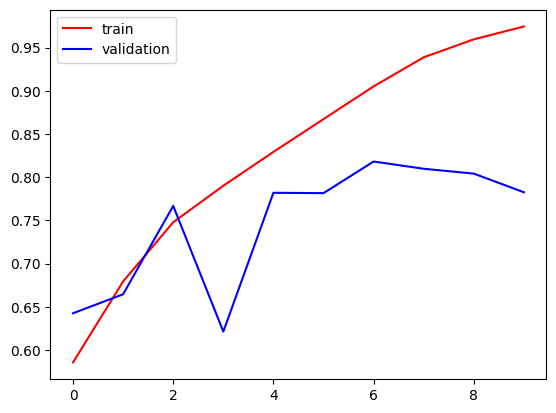

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()


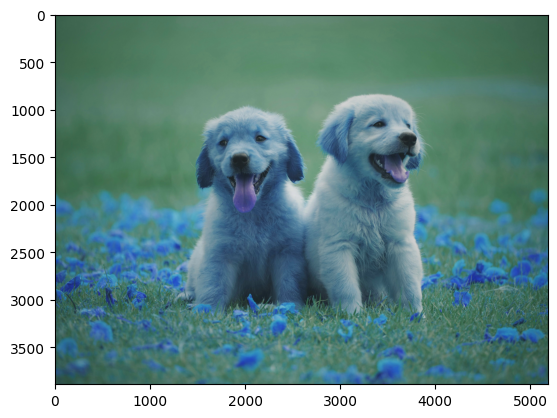

In [19]:
import cv2
test_image = cv2.imread('/content/dog.jpeg')
plt.imshow(test_image)

In [20]:
test_image.shape

(3888, 5184, 3)

In [21]:
test_image = cv2.resize(test_image,(256,256))

In [22]:
test_input = test_image.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)